In [1]:
# ---- STEP 1 ----

# In the first step, we install the libraries we need to install

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [3]:
# ---- STEP 2 ----

# We used the number 42, which is the most popular number in the seeds. You can give any number you want.
np.random.seed(42)

# We made the number of customers 100
num_customers = 100

# My project start date is ‘2025-02-20’ = today.
today = pd.to_datetime("2025-02-20")

# Customer reviews and ratings
review_text_score = {
    "Terrible experience" : 1,
    "Late delivery!" : 2 ,
    "Average support" : 3,
    "Good quality" : 4,
    "Great service!": 5}

In [5]:
# ---- STEP 3 ----

# Random Product

purchase_category = np.random.choice(["Electronics", "Clothing", "Home Appliances"], num_customers)

#-----------------------------------

# Randomly assign comments and scores

# Select a random comment for each customer
selected_reviews = np.random.choice(list(review_text_score.keys()), num_customers)

# Get scores corresponding to selected comments
# selected_reviews will contain reviews randomly assigned to customers.
# review_scores will contain the corresponding scores of these reviews.
review_scores = [review_text_score[review] for review in selected_reviews]

#-----------------------------------
# Random customer data
customers_id = np.arange(1, num_customers +1)

#-----------------------------------
# Product categories
selected_product = np.random.choice (['Electronics','Clothing','Home Appliances'],num_customers)

#-----------------------------------
# Random response times
response_time_starting = today - pd.to_timedelta(np.random.randint(1,365,num_customers), unit = 'h')

response_time_end = response_time_starting + pd.to_timedelta(np.random.randint(2,365,num_customers), unit = 'h')

# Random solution state
resolved = np.random.choice(["YES","NO"],num_customers)



In [7]:
# ---- STEP 4 ----

# We created our dataframe area.

df = pd.DataFrame({
    'Customer_ID' : customers_id,
    'Review Scores' : review_scores,
    'Selected Reviews' : selected_reviews,
    'Purchase Category' : purchase_category,
    'Responce Time' : response_time_end,
    'Resolved' : resolved
    })


In [9]:
# ---- STEP 5 ----

# The reason why we add print (‘-------------_ _ _ _ _ _----------’ ) in between is to avoid confusing the data.

print ("-------------df.head----------" )
# We asked it to show the first 5 row
print(df.head()) 

print ("-------------df.info----------" )
# We asked it to give general information of the data set
print (df.info())

print ("-------------df.describe----------" )
# We asked it to show summary statistics of numeric columns
print (df.describe())


-------------df.head----------
   Customer_ID  Review Scores     Selected Reviews Purchase Category  \
0            1              4         Good quality   Home Appliances   
1            2              3      Average support       Electronics   
2            3              3      Average support   Home Appliances   
3            4              1  Terrible experience   Home Appliances   
4            5              3      Average support       Electronics   

        Responce Time Resolved  
0 2025-02-20 10:00:00       NO  
1 2025-02-13 13:00:00      YES  
2 2025-02-08 11:00:00       NO  
3 2025-02-23 05:00:00      YES  
4 2025-02-18 19:00:00      YES  
-------------df.info----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_ID        100 non-null    int32         
 1   Review Scores      100 non-null   

-------------Graphic 1(BAR)----------


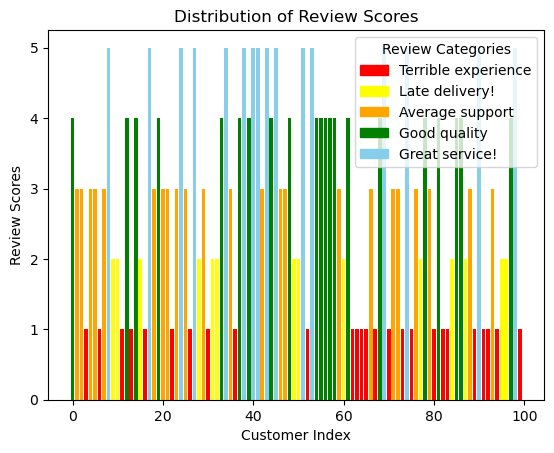

In [11]:
# ---- STEP 6 ----

print ("-------------Graphic 1(BAR)----------" )

# Distribution of Review Scores

# we made colour assignments
review_colors = {
    "Terrible experience" : "red",
    "Late delivery!" : "yellow" ,
    "Average support" : "orange",
    "Good quality" : "green",
    "Great service!": "skyblue"}

# We set the colours 
bar_colors = [review_colors[review] for review in selected_reviews[:num_customers]]

plt.figure()
plt.bar(
        range(num_customers), # X axis: 100 customers
        review_scores[:num_customers], # Y axis: 100 customer's score
        color = bar_colors) # Where we specify the colourss

plt.xlabel('Customer Index')
plt.ylabel('Review Scores')
plt.title('Distribution of Review Scores')

# Info box

legend_patches = [mpatches.Patch(color=color, label=review) for review, color in review_colors.items()]
plt.legend(handles=legend_patches, title="Review Categories")

plt.show()

-------------Graphic 2(PIE)----------


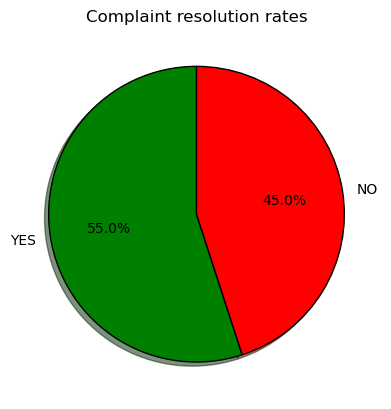

In [13]:
# ---- STEP 7 ----

print ("-------------Graphic 2(PIE)----------" )

# Complaint resolution rates

# Determine the number of ‘YES’ and ‘NO’ values
resolution_counts = df["Resolved"].value_counts()

plt.figure()

plt.pie(
        resolution_counts, # Numbers corresponding to each category
        labels=resolution_counts.index, # ‘YES’ and ‘NO’ labels
        autopct = '%1.1f%%',
        colors = ['green', 'red'], # YES = green, NO = red
        startangle = 90,
        wedgeprops = {'edgecolor' : 'black'},
        shadow = True
        )

plt.title('Complaint resolution rates')  # Title
plt.show()

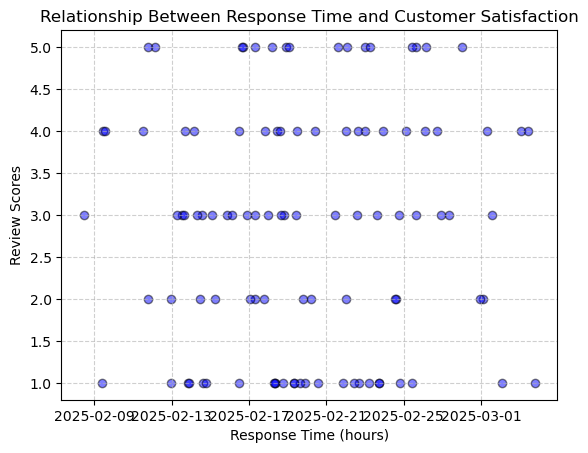

In [15]:
# ---- STEP 8 ----

plt.figure()

# Scatter plot
plt.scatter(response_time_end, review_scores, c='blue', alpha=0.5, edgecolors='black')

"""
plt.scatter(response_time_end, review_scores, c=‘blue’, alpha=0.5, edgecolors=‘black’)

CODE DESCRIPTION:

1. response_time_end: Response time on X axis (in hours)
2. review_scores: Customer satisfaction scores on the y-axis
3. c=‘blue’: All dots are coloured blue
4. alpha=0.5: Increase the visibility of overlapping dots by adding transparency
5. edgecolors=‘black’: Make the edges of the dots black

Adding axis labels and title:

1. xlabel() → Naming for X axis
2. ylabel() → Nomenclature for Y axis
3. title() → Add title

plt.grid(True, linestyle=‘--’, alpha=0.6): Adding a grill

Adds lines to make the graph more readable
"""
# Axis labels
plt.xlabel("Response Time (hours)")
plt.ylabel("Review Scores")
plt.title("Relationship Between Response Time and Customer Satisfaction")

# Adding a grid (to make it more readable)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()